In [1]:
from eyring_model import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 8
plt.rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')

In [2]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_paths = 2000 # infinite limit, approximately corresponds to unit area = 0.1 um^2

barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}


#### Equal number of jumps, equal jump lengths, equal barriers

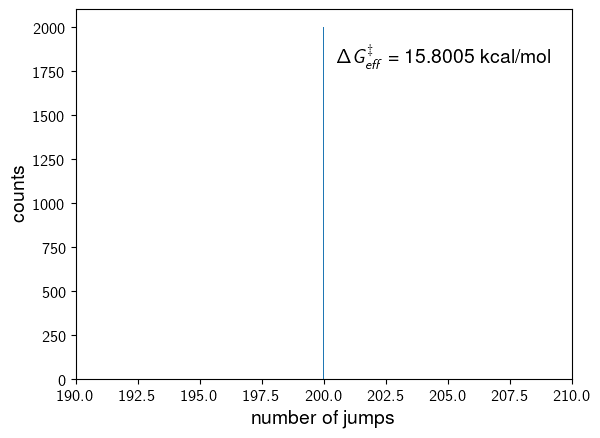

In [3]:
n_jump_params = {'mu' : 200}
rng = np.random.default_rng()
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)


dG0 = model.calculate_effective_barrier()

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(n_jump_params['mu']+0.5, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(190, 210)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

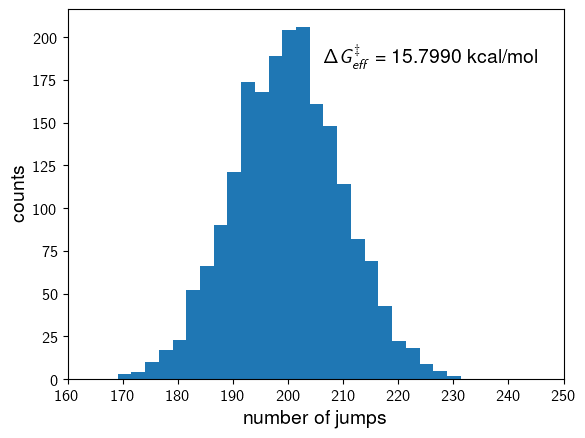

In [4]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xlim(160, 250)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 2000 jumps, std = 100**

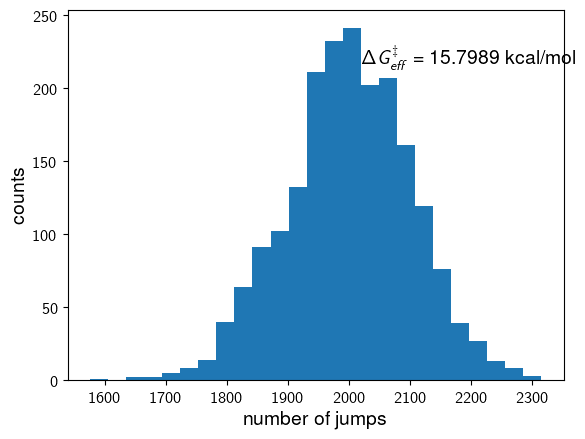

In [5]:
n_jump_params = {'mu' : 2000,
                'sigma' : 100}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-11], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed number of jumps, equal jump lengths, equal barriers

**Mean = 200**

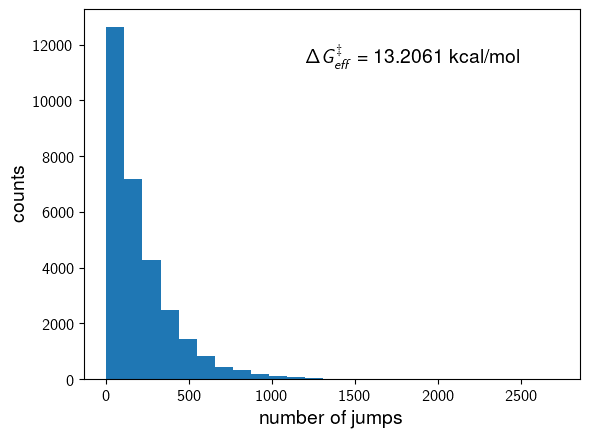

In [6]:
n_paths = 30_000

n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [7]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
for p in sorted_paths[:5]:
    print(p.n_jumps)

print()

print('Paths with high permeability:')
for p in sorted_paths[-5:]:
    print(p.n_jumps)

Paths with low permeability:
2721
2097
1754
1733
1723

Paths with high permeability:
1
1
1
1
1


**Mean = 2000**

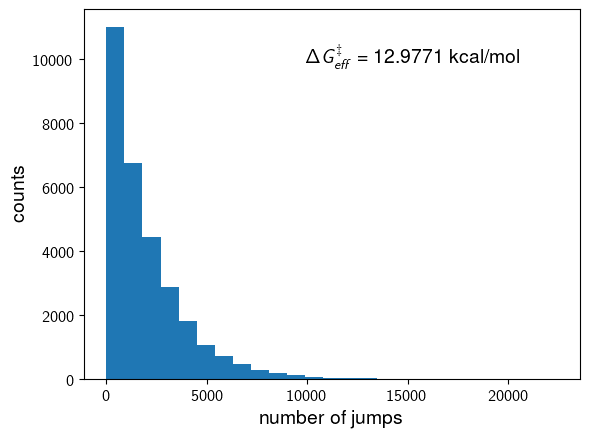

In [8]:
n_paths = 30_000

n_jump_params = {'beta' : 2000}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)

h, b, bar = plt.hist(n_jumps, bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('number of jumps', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Equal jump lengths, equal number of jumps, equal barriers

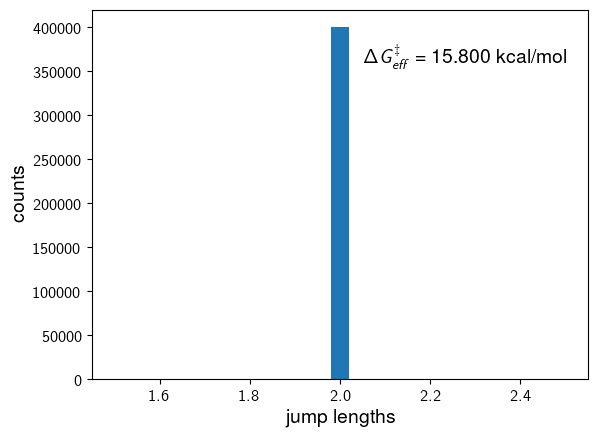

In [9]:
n_paths = 2000

jump_length_dist = 'equal'
jump_length_params = {'mu' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(jump_lengths.mean()+0.05, h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.3f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

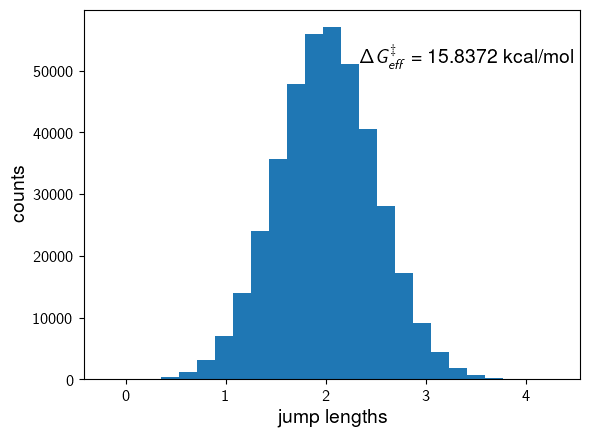

In [10]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Mean = 20**

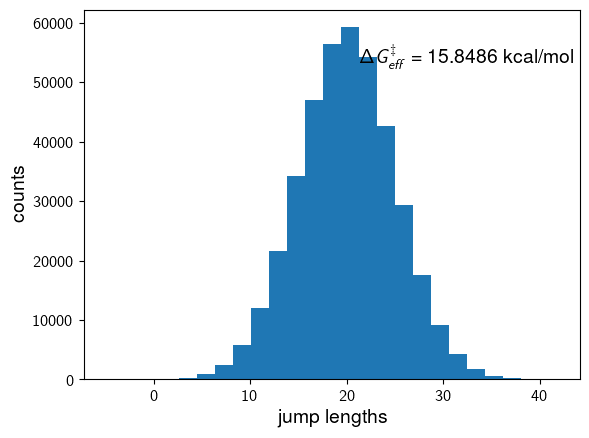

In [11]:
jump_length_dist = 'normal'
jump_length_params = {'mu' : 20, 'sigma' : 5}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-12], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Exponentially distributed jump lengths, equal number of jumps, equal barriers

**Mean = 2**

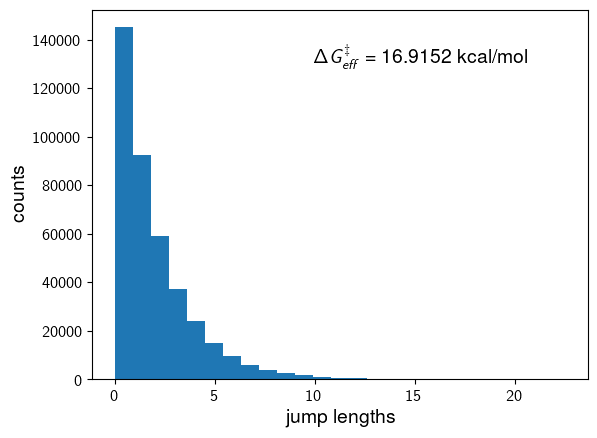

In [12]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [13]:
model.calculate_permeability()
sorted_paths = np.array(model.paths)[model.permeabilities.argsort()]
print('Paths with low permeability:')
print('mean, std, min, max')
for p in sorted_paths[:5]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

print()

print('Paths with high permeability:')
print('mean, std, min, max')
for p in sorted_paths[-5:]:
    print(p.jump_lengths.mean(), p.jump_lengths.std(),  p.jump_lengths.min(), p.jump_lengths.max())

Paths with low permeability:
mean, std, min, max
2.231782144943108 2.605415003422494 2.565262681989671e-05 21.431528101564556
2.1393339515369507 2.23016464863961 3.149439171730708e-05 13.32179454528887
1.8926645937982005 1.960077254234184 3.623531924852667e-05 11.89789028748801
2.1885816715461597 2.1636706752354713 3.342754574669469e-05 11.654278004045537
2.036056551908291 1.8648388614327072 4.176857401765302e-05 9.890707056874454

Paths with high permeability:
mean, std, min, max
2.2810142332104313 2.201463413719766 0.05269937272048161 10.017104857252827
2.3121020998809243 2.0375292321601224 0.04229173874104909 9.903622933899001
2.173661136008926 1.917047945091458 0.07060299362358834 10.21941252447797
2.2459425506861965 1.9295108107800811 0.0726088166448597 9.757770648958074
2.0810694754685146 2.02038064307872 0.08908727362289456 11.713937650698877


**Mean = 20**

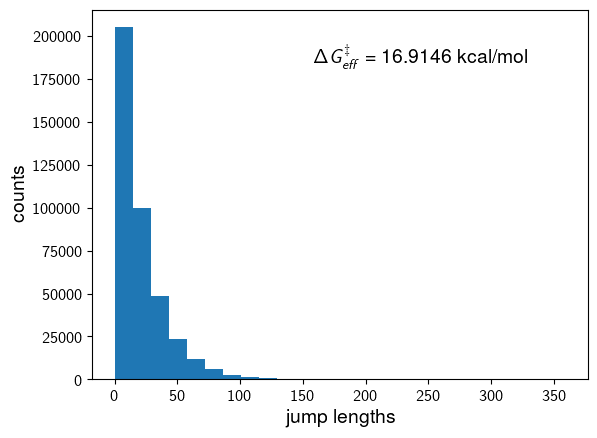

In [14]:
jump_length_dist = 'exponential'
jump_length_params = {'beta' : 20}

n_jump_params = {'mu' : 200}
n_jumps = np.ones(n_paths)*n_jump_params['mu']

jump_lengths = np.zeros((n_paths, n_jump_params['mu']))

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    jump_lengths[n,:] = model.paths[n].jump_lengths

h, b, bar = plt.hist(jump_lengths.flatten(), bins=25)
plt.text(b[-15], h.max()*0.9, f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)
plt.xlabel('jump lengths', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

#### Normally distributed number of jumps, normally distributed jump lengths, equal barriers

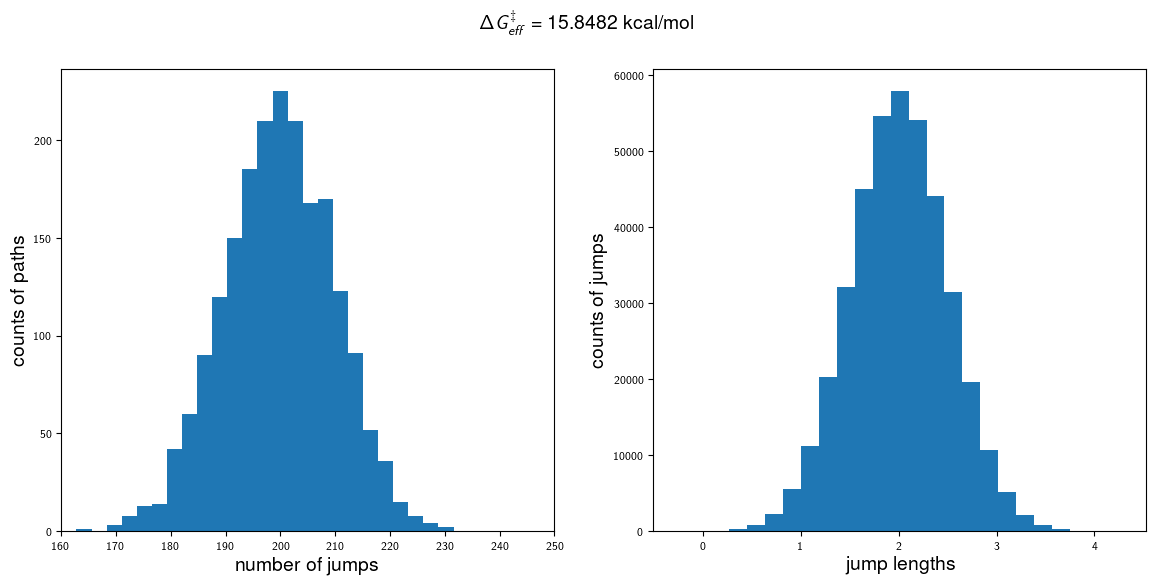

In [15]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Normally distributed number of jumps, exponentially distributed jump lengths, equal barriers

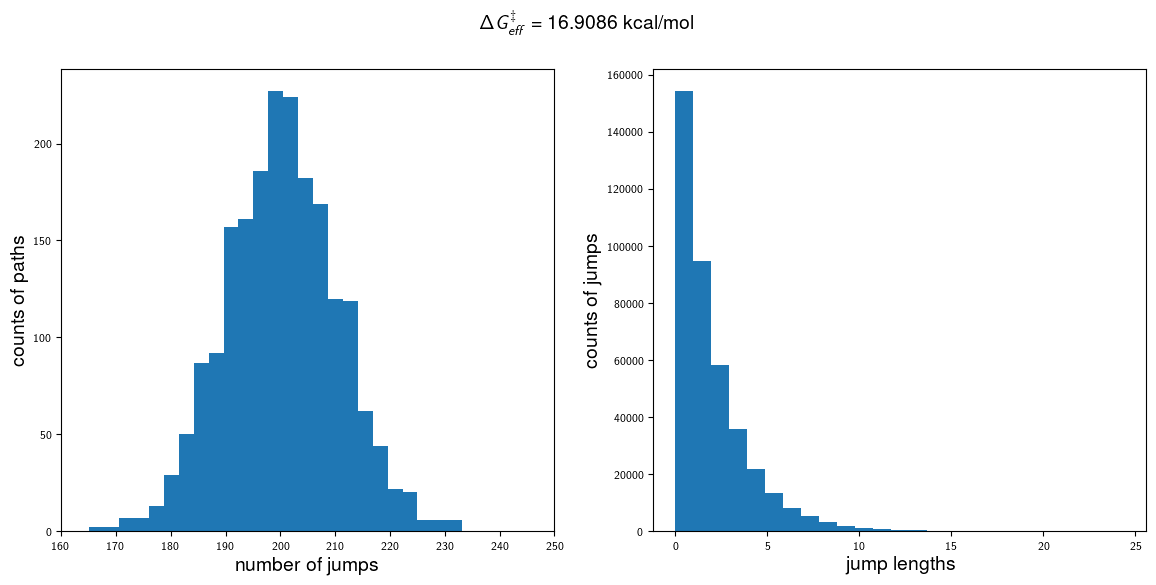

In [16]:
n_jump_params = {'mu' : 200,
                'sigma' : 10}
rng = np.random.default_rng()
n_jumps = rng.normal(loc=n_jump_params['mu'], scale=n_jump_params['sigma'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n]), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(14,6))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)
ax[0].set_xlim(160, 250)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, normally distributed jump lengths, equal barriers

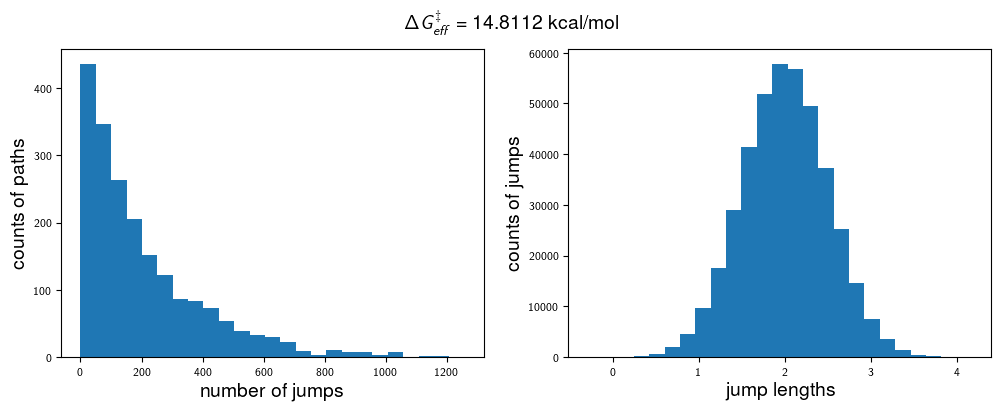

In [17]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'normal'
jump_length_params = {'mu' : 2, 'sigma' : 0.5}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['mu'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

#### Exponentially distributed number of jumps, exponentially distributed jump lengths, equal barriers

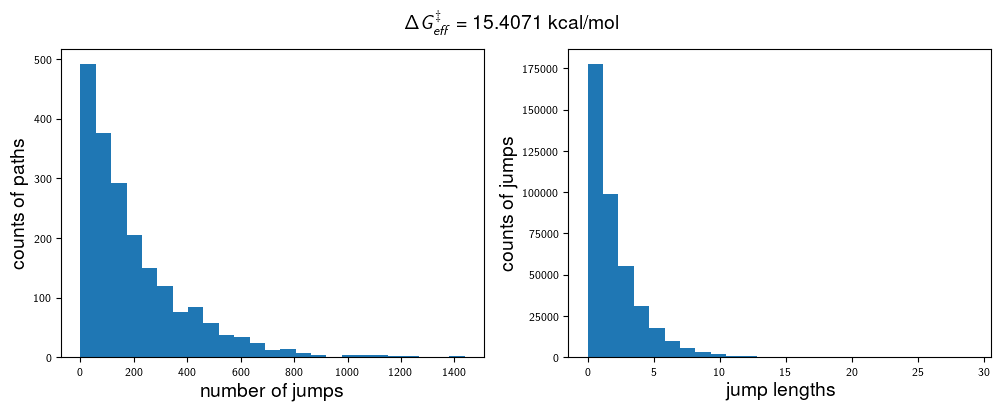

In [18]:
n_jump_params = {'beta' : 200}
rng = np.random.default_rng()
n_jumps = rng.exponential(n_jump_params['beta'], size=n_paths)

jump_length_dist = 'exponential'
jump_length_params = {'beta' : 2}

jump_lengths = []

model = EyringModel(T=T)
for n in range(n_paths):
    model.add_Path(n_jumps=int(n_jumps[n] // 1 + 1), lam=jump_length_params['beta'])
    model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
    model.paths[n].generate_jump_distribution(dist=jump_length_dist, dist_params=jump_length_params)
    [jump_lengths.append(lam) for lam in model.paths[n].jump_lengths]

fig, ax = plt.subplots(1,2, figsize=(12,4))
plt.suptitle(f'$\Delta G_{{eff}}^{{\ddag}}$ = {model.calculate_effective_barrier():.4f} kcal/mol', fontsize=14)

h, b, bar = ax[0].hist(n_jumps, bins=25)
ax[0].set_xlabel('number of jumps', fontsize=14)
ax[0].set_ylabel('counts of paths', fontsize=14)

h, b, bar = ax[1].hist(jump_lengths, bins=25)
ax[1].set_xlabel('jump lengths', fontsize=14)
ax[1].set_ylabel('counts of jumps', fontsize=14);

### Normal distributions sweeping through variance

In [19]:
n_paths = 5000
delta = 400 # membrane thickness

jump_length_dist = 'equal'
n_jump_mu = 100

num_sigs = np.linspace(5, 200, 100)
num_dG = np.zeros((len(num_sigs)))
models1 = []

for i,ns in tqdm(enumerate(num_sigs)):

    rng = np.random.default_rng()
    n_jumps = rng.normal(loc=n_jump_mu, scale=ns, size=n_paths)
    idx = np.where(n_jumps <= 1)[0]
    while len(idx) > 0:
        n_jumps[idx] = rng.normal(loc=n_jump_mu, scale=ns, size=len(idx))
        idx = np.where(n_jumps <= 1)[0]

    model = EyringModel(T=T)
    for n in range(n_paths):
        model.add_Path(n_jumps=round(n_jumps[n]), lam=delta/n_jumps[n])
        model.paths[n].generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)

    num_dG[i] = model.calculate_effective_barrier()
    models1.append(model)

100it [01:27,  1.14it/s]


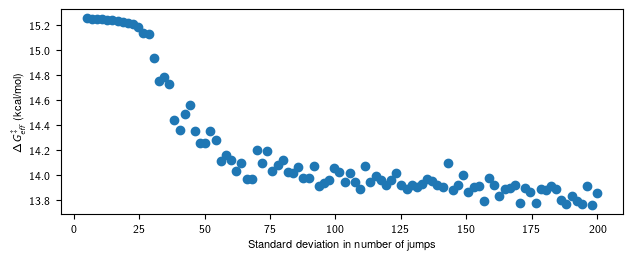

In [35]:
num_sigs = np.linspace(5, 200, 100)
fig, ax = plt.subplots(1,1, figsize=(7.25,2.6625))
plt.scatter(num_sigs, num_dG)
plt.ylabel('$\Delta G_{eff}^{\ddag}$ (kcal/mol)')
plt.xlabel('Standard deviation in number of jumps')
plt.savefig('figs/jump_number_variance.pdf')

In [21]:
all_deltas = np.zeros((len(models1), n_paths))
all_njumps = np.zeros((len(models1), n_paths))
all_lengths = []
permeabilities = np.zeros(len(models1))
for i,m in enumerate(models1):
    all_deltas[i,:] = np.array(m.deltas) / 10
    permeabilities[i] = m.calculate_permeability()
    for j,p in enumerate(m.paths):
        [all_lengths.append(l) for l in p.jump_lengths]
        all_njumps[i,j] = len(p.jump_lengths)

Text(0.5, 0, 'Standard deviation in number of jumps')

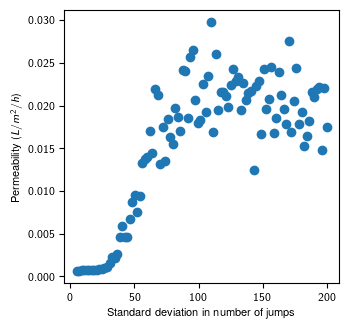

In [32]:
num_sigs = np.linspace(5, 200, 100)
fig, ax = plt.subplots(1,1, figsize=(3.55,3.55))
plt.scatter(num_sigs, permeabilities)
plt.ylabel('Permeability ($L/m^2/h$)')
plt.xlabel('Standard deviation in number of jumps')

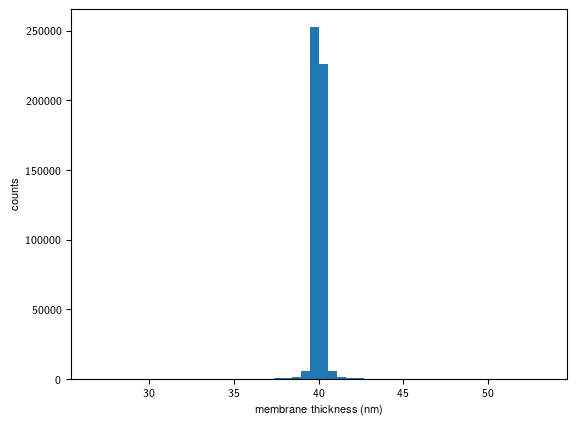

In [23]:
plt.hist(all_deltas.flatten(), bins=50)
plt.xlabel('membrane thickness (nm)')
plt.ylabel('counts');

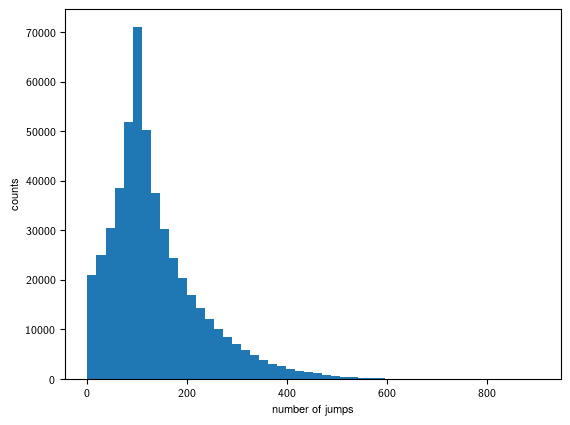

In [24]:
plt.hist(all_njumps.flatten(), bins=50)
plt.xlabel('number of jumps')
plt.ylabel('counts');

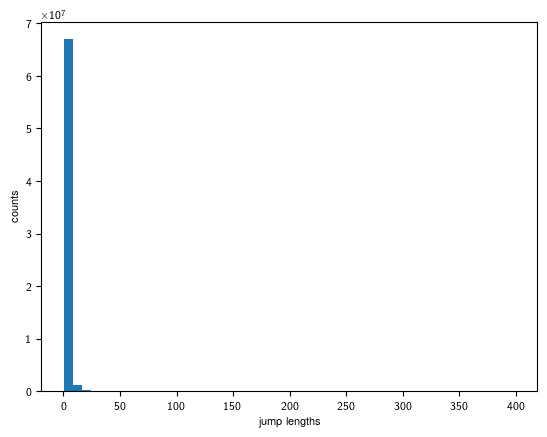

In [25]:
plt.hist(all_lengths, bins=50)
plt.xlabel('jump lengths')
plt.ylabel('counts');

In [26]:
m = models1[-1]
m.calculate_permeability()

df1 = pd.DataFrame()
df1['path'] = np.arange(n_paths)+1
df1['permeability'] = m.permeabilities
df1['percent permeability'] = m.permeabilities / m.permeabilities.sum() * 100
df1['path effective barrier'] = [p.calculate_effective_barrier() for p in m.paths]
df1['jump number'] = [p.n_jumps for p in m.paths]
df1.head()

,path,permeability,percent permeability,path effective barrier,jump number
0,1,0.011979,0.000134,12.5,241
1,2,0.006311,0.000071,12.5,332
2,3,0.006496,0.000073,12.5,327
3,4,0.023724,0.000266,12.5,171
4,5,0.029790,0.000334,12.5,153


Text(0, 0.5, 'Permeability ($L/m^2/h$)')

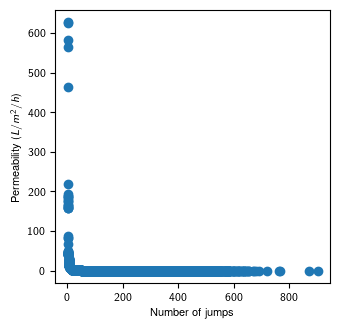

In [27]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 3.55))
ax.scatter(df1['jump number'], df1['permeability'])
ax.set_xlabel('Number of jumps')
ax.set_ylabel('Permeability ($L/m^2/h$)')

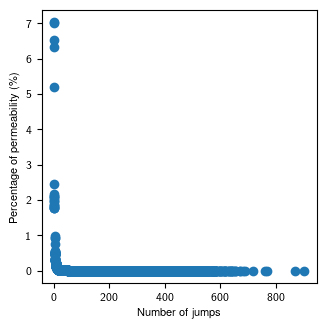

In [28]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 3.55))
ax.scatter(df1['jump number'], df1['percent permeability'])
ax.set_xlabel('Number of jumps')
ax.set_ylabel('Percentage of permeability (\%)')
fig.savefig('figs/percent_perm_vs_n_jumps_high_variance.pdf')

In [29]:
m = models1[0]
m.calculate_permeability()

df1 = pd.DataFrame()
df1['path'] = np.arange(n_paths)+1
df1['permeability'] = m.permeabilities
df1['percent permeability'] = m.permeabilities / m.permeabilities.sum() * 100
df1['path effective barrier'] = [p.calculate_effective_barrier() for p in m.paths]
df1['jump number'] = [p.n_jumps for p in m.paths]
df1.head()

,path,permeability,percent permeability,path effective barrier,jump number
0,1,0.068183,0.019451,12.5,101
1,2,0.057209,0.016321,12.5,110
2,3,0.068113,0.019432,12.5,101
3,4,0.083628,0.023858,12.5,91
4,5,0.059670,0.017023,12.5,108


Text(0, 0.5, 'Permeability ($L/m^2/h$)')

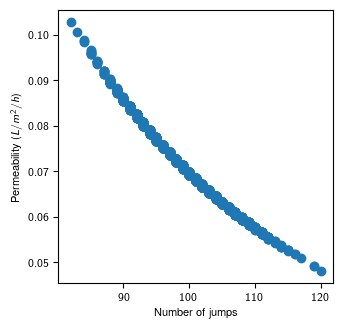

In [30]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 3.55))
ax.scatter(df1['jump number'], df1['permeability'])
ax.set_xlabel('Number of jumps')
ax.set_ylabel('Permeability ($L/m^2/h$)')

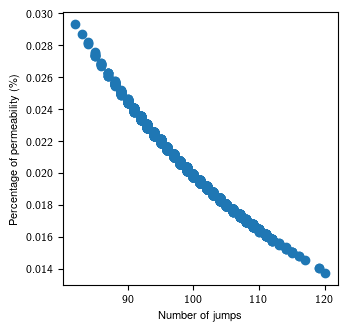

In [31]:
fig, ax = plt.subplots(1,1, figsize=(3.55, 3.55))
ax.scatter(df1['jump number'], df1['percent permeability'])
ax.set_xlabel('Number of jumps')
ax.set_ylabel('Percentage of permeability (\%)')
fig.savefig('figs/percent_perm_vs_n_jumps_low_variance.pdf')